In [298]:
# 然后在insights看图，然后直接在这里面把高相关的列扔了，而且也不是什么图都看，主要是协方差矩阵

# 地图，两种变量之间的关系，直方图

# *** 注意2023_resale_price_with_geolocation___minMrt_w_t___minPrimary_w_t.csv这里面的mrt欧几里得距离更能忘了更改名字，一定要和后面对起来







In [299]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

hdb_df = pd.read_csv('2023_resale_price_with_geolocation___minMrt_w_t___minPrimary_w_t.csv')

hdb_df

block flat_model  flat_type  floor_area_sqm       lat  \
0       406   Improved     2 ROOM            44.0  1.362005   
1       323   Improved     2 ROOM            49.0  1.367908   
2       314   Improved     2 ROOM            44.0  1.366227   
3       314   Improved     2 ROOM            44.0  1.366227   
4       170   Improved     2 ROOM            45.0  1.374001   
...     ...        ...        ...             ...       ...   
20424  676B   Improved     5 ROOM           113.0  1.421558   
20425  115C   Improved     5 ROOM           110.0  1.433784   
20426   224    Model A     5 ROOM           134.0  1.434633   
20427   225    Model A     5 ROOM           134.0  1.434831   
20428   643  Apartment  EXECUTIVE           142.0  1.421335   

       lease_commence_date         lng  minMrt_transitTime  \
0                     1979  103.853880               451.0   
1                     1977  103.847714               277.0   
2                     1978  103.850086               220.0   
3                     1978  103.850086               220.0   
4                     1986  103.836432               652.0   
...                    ...         ...                 ...   
20424                 2018  103.842782               521.0   
20425                 2001  103.827490               664.0   
20426                 1985  103.835208               311.0   
20427                 1985  103.835814               383.0   
20428                 1987  103.837437               489.0   

       minMrt_walkDistance  minMrt_walkTime  ...  min_mrt_lat  min_mrt_lng  \
0                   1126.0            811.0  ...     1.370025   103.849588   
1                    453.0            327.0  ...     1.370025   103.849588   
2                    507.0            365.0  ...     1.370025   103.849588   
3                    507.0            365.0  ...     1.370025   103.849588   
4                   1658.0           1194.0  ...     1.381765   103.844923   
...                    ...              ...  ...          ...          ...   
20424               1695.0           1220.0  ...     1.417423   103.832995   
20425               1270.0            914.0  ...     1.429666   103.835044   
20426                668.0            481.0  ...     1.429666   103.835044   
20427                750.0            540.0  ...     1.429666   103.835044   
20428                919.0            662.0  ...     1.417423   103.832995   

       min_primary_lat  min_primary_lng    month  remaining_lease  \
0             1.349782       103.854529  2023-01        55.416667   
1             1.360583       103.833020  2023-01        53.500000   
2             1.349782       103.854529  2023-01        54.083333   
3             1.349782       103.854529  2023-01        54.083333   
4             1.384264       103.841392  2023-01        62.083333   
...                ...              ...      ...              ...   
20424         1.420970       103.840928  2023-10        94.083333   
20425         1.438396       103.839309  2023-10        76.750000   
20426         1.438396       103.839309  2023-10        60.916667   
20427         1.438396       103.839309  2023-10        61.250000   
20428         1.420970       103.840928  2023-10        63.000000   

      resale_price  storey_range        street_name        town  
0         267000.0      01 TO 03  ANG MO KIO AVE 10  ANG MO KIO  
1         300000.0      04 TO 06   ANG MO KIO AVE 3  ANG MO KIO  
2         280000.0      04 TO 06   ANG MO KIO AVE 3  ANG MO KIO  
3         282000.0      07 TO 09   ANG MO KIO AVE 3  ANG MO KIO  
4         289800.0      01 TO 03   ANG MO KIO AVE 4  ANG MO KIO  
...            ...           ...                ...         ...  
20424     700000.0      07 TO 09     YISHUN RING RD      YISHUN  
20425     600000.0      10 TO 12     YISHUN RING RD      YISHUN  
20426     656000.0      10 TO 12       YISHUN ST 21      YISHUN  
20427     610000.0      01 TO 03       YISHUN ST 21      YISHUN  
20428     80

In [300]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20429 entries, 0 to 20428
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   block                      20429 non-null  object 
 1   flat_model                 20429 non-null  object 
 2   flat_type                  20429 non-null  object 
 3   floor_area_sqm             20429 non-null  float64
 4   lat                        20429 non-null  float64
 5   lease_commence_date        20429 non-null  int64  
 6   lng                        20429 non-null  float64
 7   minMrt_transitTime         20187 non-null  float64
 8   minMrt_walkDistance        20344 non-null  float64
 9   minMrt_walkTime            20344 non-null  float64
 10  minPrimary_transitTime     20210 non-null  float64
 11  minPrimary_walkDistance    20078 non-null  float64
 12  minPrimary_walkTime        20078 non-null  float64
 13  min_dis                    20429 non-null  flo

In [301]:
# drop useless columns & create dummy variables
hdb_df = hdb_df.drop(['street_name', 'month', 'block'], axis = 1)

hdb_df = hdb_df.join(pd.get_dummies(hdb_df.flat_model)).drop(['flat_model'], axis = 1)
hdb_df = hdb_df.join(pd.get_dummies(hdb_df.flat_type)).drop(['flat_type'], axis = 1)
hdb_df = hdb_df.join(pd.get_dummies(hdb_df.storey_range)).drop(['storey_range'], axis = 1)
hdb_df = hdb_df.join(pd.get_dummies(hdb_df.town)).drop(['town'], axis = 1)

hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20429 entries, 0 to 20428
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   floor_area_sqm             20429 non-null  float64
 1   lat                        20429 non-null  float64
 2   lease_commence_date        20429 non-null  int64  
 3   lng                        20429 non-null  float64
 4   minMrt_transitTime         20187 non-null  float64
 5   minMrt_walkDistance        20344 non-null  float64
 6   minMrt_walkTime            20344 non-null  float64
 7   minPrimary_transitTime     20210 non-null  float64
 8   minPrimary_walkDistance    20078 non-null  float64
 9   minPrimary_walkTime        20078 non-null  float64
 10  min_dis                    20429 non-null  float64
 11  min_dis_primary            20429 non-null  object 
 12  min_dis_primary_euclidean  20429 non-null  float64
 13  min_dis_station            20429 non-null  obj

In [302]:
hdb_df.dropna(inplace = True)

# still have 96.5784% datasets
hdb_df = hdb_df.reset_index().drop('index', axis = 1)

hdb_df

floor_area_sqm       lat  lease_commence_date         lng  \
0                44.0  1.362005                 1979  103.853880   
1                49.0  1.367908                 1977  103.847714   
2                44.0  1.366227                 1978  103.850086   
3                44.0  1.366227                 1978  103.850086   
4                45.0  1.374001                 1986  103.836432   
...               ...       ...                  ...         ...   
19725           113.0  1.421558                 2018  103.842782   
19726           110.0  1.433784                 2001  103.827490   
19727           134.0  1.434633                 1985  103.835208   
19728           134.0  1.434831                 1985  103.835814   
19729           142.0  1.421335                 1987  103.837437   

       minMrt_transitTime  minMrt_walkDistance  minMrt_walkTime  \
0                   451.0               1126.0            811.0   
1                   277.0                453.0            327.0   
2                   220.0                507.0            365.0   
3                   220.0                507.0            365.0   
4                   652.0               1658.0           1194.0   
...                   ...                  ...              ...   
19725               521.0               1695.0           1220.0   
19726               664.0               1270.0            914.0   
19727               311.0                668.0            481.0   
19728               383.0                750.0            540.0   
19729               489.0                919.0            662.0   

       minPrimary_transitTime  minPrimary_walkDistance  minPrimary_walkTime  \
0                       887.0                   2192.0               1579.0   
1                       871.0                   2692.0               1939.0   
2                      1231.0                   2744.0               1976.0   
3                      1231.0                   2744.0               1976.0   
4                       612.0                   1634.0               1177.0   
...                       ...                      ...                  ...   
19725                   736.0                   1124.0                810.0   
19726                  1142.0                   1957.0               1409.0   
19727                   800.0                    820.0                590.0   
19728                   856.0                    740.0                533.0   
19729                   581.0                    604.0                434.0   

       ...  PASIR RIS PUNGGOL  QUEENSTOWN SEMBAWANG  SENGKANG  SERANGOON  \
0      ...      False   False       False     False     False      False   
1      ...      False   False       False     False     False      False   
2      ...      False   False       False     False     False      False   
3      ...      False   False       False     False     False      False   
4      ...      False   False       False     False     False      False   
...    ...        ...     ...         ...       ...       ...        ...   
19725  ...      False   False       False     False     False      False   
19726  ...      False   False       False     False     False      False   
19727  ...      False   False       False     False     False      False   
19728  ...      False   False       False     False     False      False   
19729  ...      False   False       False     False     False      False   

       TAMPINES  TOA PAYOH  WOODLANDS  YISHUN  
0         False      False      False   False  
1         False      False      False   False  
2         False      False      False   False  
3         False      False      False   False  
4         False      False      False   False  
...         ...        ...        ...     ...  
19725     False      False      False    True  
19726     False      False      False    True  
19727     False      False      False    True  
19728     False      False      False    Tr

In [303]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19730 entries, 0 to 19729
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   floor_area_sqm             19730 non-null  float64
 1   lat                        19730 non-null  float64
 2   lease_commence_date        19730 non-null  int64  
 3   lng                        19730 non-null  float64
 4   minMrt_transitTime         19730 non-null  float64
 5   minMrt_walkDistance        19730 non-null  float64
 6   minMrt_walkTime            19730 non-null  float64
 7   minPrimary_transitTime     19730 non-null  float64
 8   minPrimary_walkDistance    19730 non-null  float64
 9   minPrimary_walkTime        19730 non-null  float64
 10  min_dis                    19730 non-null  float64
 11  min_dis_primary            19730 non-null  object 
 12  min_dis_primary_euclidean  19730 non-null  float64
 13  min_dis_station            19730 non-null  obj

In [304]:
# calculte the price / sqm

def set_price_perSqm(row):
    row['resale_price_per_sqm'] = row['resale_price'] / row['floor_area_sqm']

    return row

hdb_df = hdb_df.apply(set_price_perSqm, axis = 1)

hdb_df = hdb_df.drop(['resale_price', 'floor_area_sqm', 'min_dis_primary', 'min_dis_station'], axis = 1)

hdb_df

lat  lease_commence_date         lng  minMrt_transitTime  \
0      1.362005                 1979  103.853880               451.0   
1      1.367908                 1977  103.847714               277.0   
2      1.366227                 1978  103.850086               220.0   
3      1.366227                 1978  103.850086               220.0   
4      1.374001                 1986  103.836432               652.0   
...         ...                  ...         ...                 ...   
19725  1.421558                 2018  103.842782               521.0   
19726  1.433784                 2001  103.827490               664.0   
19727  1.434633                 1985  103.835208               311.0   
19728  1.434831                 1985  103.835814               383.0   
19729  1.421335                 1987  103.837437               489.0   

       minMrt_walkDistance  minMrt_walkTime  minPrimary_transitTime  \
0                   1126.0            811.0                   887.0   
1                    453.0            327.0                   871.0   
2                    507.0            365.0                  1231.0   
3                    507.0            365.0                  1231.0   
4                   1658.0           1194.0                   612.0   
...                    ...              ...                     ...   
19725               1695.0           1220.0                   736.0   
19726               1270.0            914.0                  1142.0   
19727                668.0            481.0                   800.0   
19728                750.0            540.0                   856.0   
19729                919.0            662.0                   581.0   

       minPrimary_walkDistance  minPrimary_walkTime   min_dis  ...  PUNGGOL  \
0                       2192.0               1579.0  0.009097  ...    False   
1                       2692.0               1939.0  0.002827  ...    False   
2                       2744.0               1976.0  0.003830  ...    False   
3                       2744.0               1976.0  0.003830  ...    False   
4                       1634.0               1177.0  0.011506  ...    False   
...                        ...                  ...       ...  ...      ...   
19725                   1124.0                810.0  0.010624  ...    False   
19726                   1957.0               1409.0  0.008604  ...    False   
19727                    820.0                590.0  0.004970  ...    False   
19728                    740.0                533.0  0.005222  ...    False   
19729                    604.0                434.0  0.005919  ...    False   

       QUEENSTOWN  SEMBAWANG  SENGKANG  SERANGOON  TAMPINES  TOA PAYOH  \
0           False      False     False      False     False      False   
1           False      False     False      False     False      False   
2           False      False     False      False     False      False   
3           False      False     False      False     False      False   
4           False      False     False      False     False      False   
...           ...        ...       ...        ...       ...        ...   
19725       False      False     False      False     False      False   
19726       False      False     False      False     False      False   
19727       False      False     False      False     False      False   
19728       False      False     False      False     False      False   
19729       False      False     False      False     False      False   

       WOODLANDS  YISHUN  resale_price_per_sqm  
0          False   False           6068.181818  
1          False   False           6122.448980  
2          False   False           6363.636364  
3          False   False           6409.090909  
4          False   False           6440.000000  
...          ...     ...                   ...  
19725      False    True           6194.690265  
19726      False    True           5454.545455  
19727      Fals

In [305]:
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19730 entries, 0 to 19729
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lat                        19730 non-null  float64
 1   lease_commence_date        19730 non-null  int64  
 2   lng                        19730 non-null  float64
 3   minMrt_transitTime         19730 non-null  float64
 4   minMrt_walkDistance        19730 non-null  float64
 5   minMrt_walkTime            19730 non-null  float64
 6   minPrimary_transitTime     19730 non-null  float64
 7   minPrimary_walkDistance    19730 non-null  float64
 8   minPrimary_walkTime        19730 non-null  float64
 9   min_dis                    19730 non-null  float64
 10  min_dis_primary_euclidean  19730 non-null  float64
 11  min_mrt_lat                19730 non-null  float64
 12  min_mrt_lng                19730 non-null  float64
 13  min_primary_lat            19730 non-null  flo

array([[<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:title={'center':'lng'}>,
        <AxesSubplot:title={'center':'minMrt_transitTime'}>],
       [<AxesSubplot:title={'center':'minMrt_walkDistance'}>,
        <AxesSubplot:title={'center':'minMrt_walkTime'}>,
        <AxesSubplot:title={'center':'minPrimary_transitTime'}>,
        <AxesSubplot:title={'center':'minPrimary_walkDistance'}>],
       [<AxesSubplot:title={'center':'minPrimary_walkTime'}>,
        <AxesSubplot:title={'center':'min_dis'}>,
        <AxesSubplot:title={'center':'min_dis_primary_euclidean'}>,
        <AxesSubplot:title={'center':'min_mrt_lat'}>],
       [<AxesSubplot:title={'center':'min_mrt_lng'}>,
        <AxesSubplot:title={'center':'min_primary_lat'}>,
        <AxesSubplot:title={'center':'min_primary_lng'}>,
        <AxesSubplot:title={'center':'remaining_lease'}>],
       [<AxesSubplot:title={'center':'resale_price_per_sqm'}>,
     

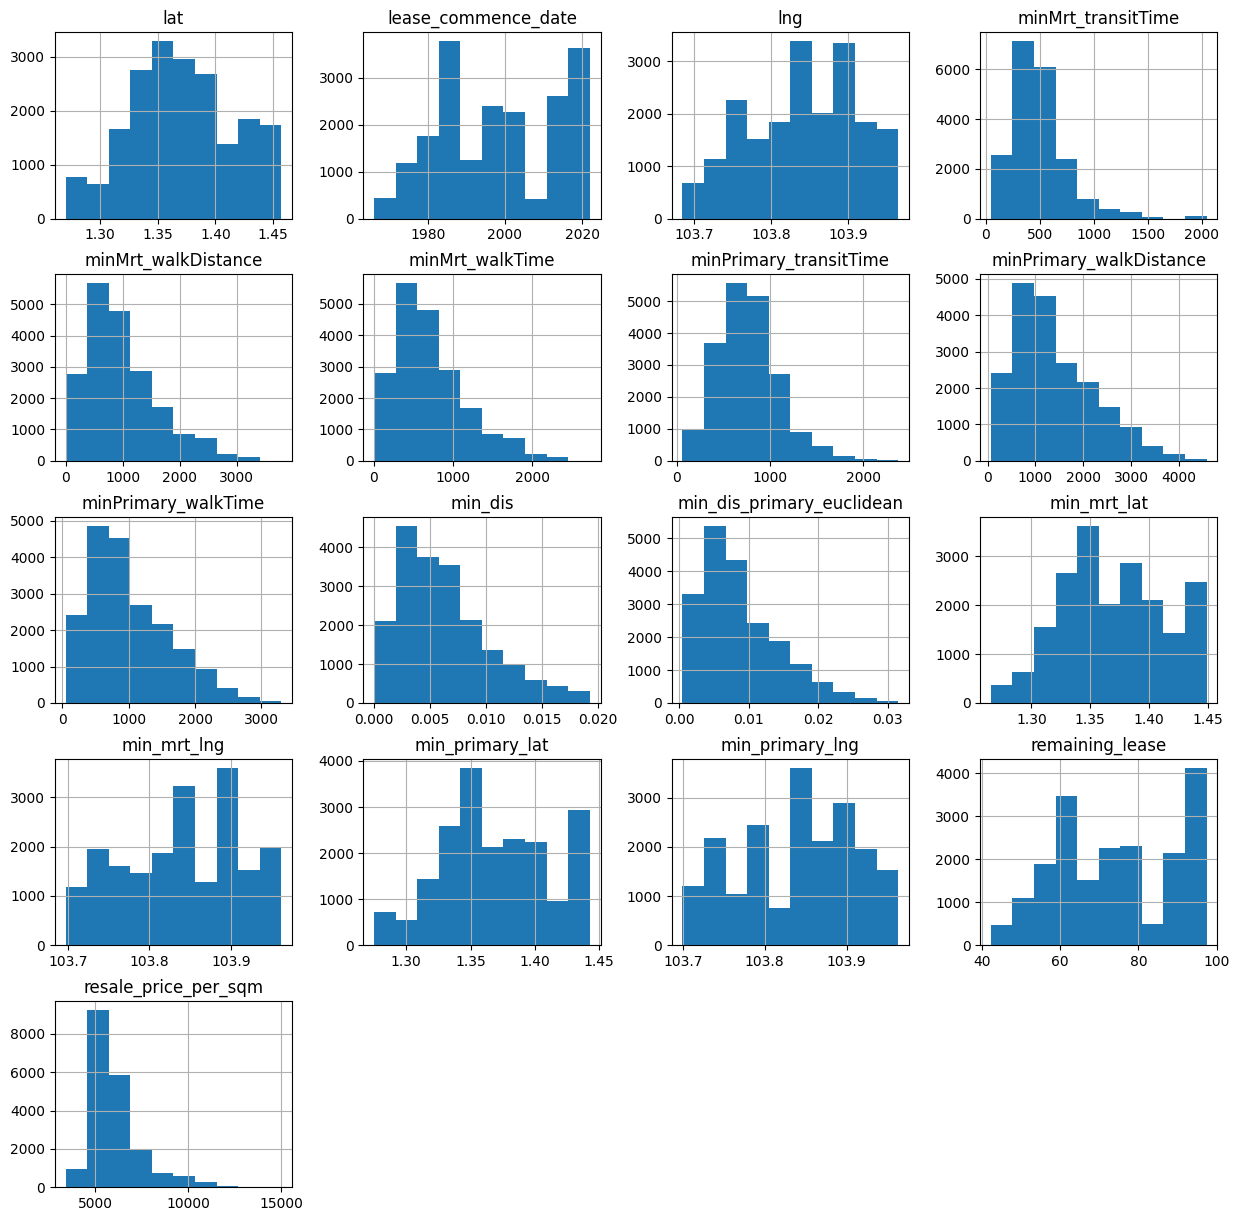

In [306]:
hdb_df.hist(figsize = (15, 15))

In [307]:
# 在这里分了，连文件也要为分成用于训练的和测试的，所以最后有两个full——hdb文件
# 因为标准化的结果要和最后用于训练的文件对起来，不能这边对所有行看了协方差就觉得对训练集也是一样的结果
# 只看对于训练集的方差，然后删除列

train = hdb_df.sample(frac = 0.7, random_state = 101)

test = hdb_df.drop(train.index)

y_train = train[['resale_price_per_sqm']]
x_train = train.drop('resale_price_per_sqm', axis = 1)

y_test = test[['resale_price_per_sqm']]
x_test = test.drop('resale_price_per_sqm', axis = 1)

In [308]:
train_corr = train.corr()

In [309]:
condition = abs(train_corr['resale_price_per_sqm']) >= 0.1

correlated_col = train_corr.columns[condition]

correlated_col = list(correlated_col)

print(correlated_col)
print(len(correlated_col))

['lat', 'lease_commence_date', 'minPrimary_transitTime', 'minPrimary_walkDistance', 'minPrimary_walkTime', 'min_dis', 'min_mrt_lat', 'min_primary_lat', 'remaining_lease', 'DBSS', 'Improved', 'Model A', 'New Generation', 'Type S1', 'Type S2', '2 ROOM', '01 TO 03', '04 TO 06', '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30', '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45', 'BISHAN', 'BUKIT MERAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'JURONG WEST', 'KALLANG/WHAMPOA', 'QUEENSTOWN', 'WOODLANDS', 'YISHUN', 'resale_price_per_sqm']
39


<AxesSubplot:>

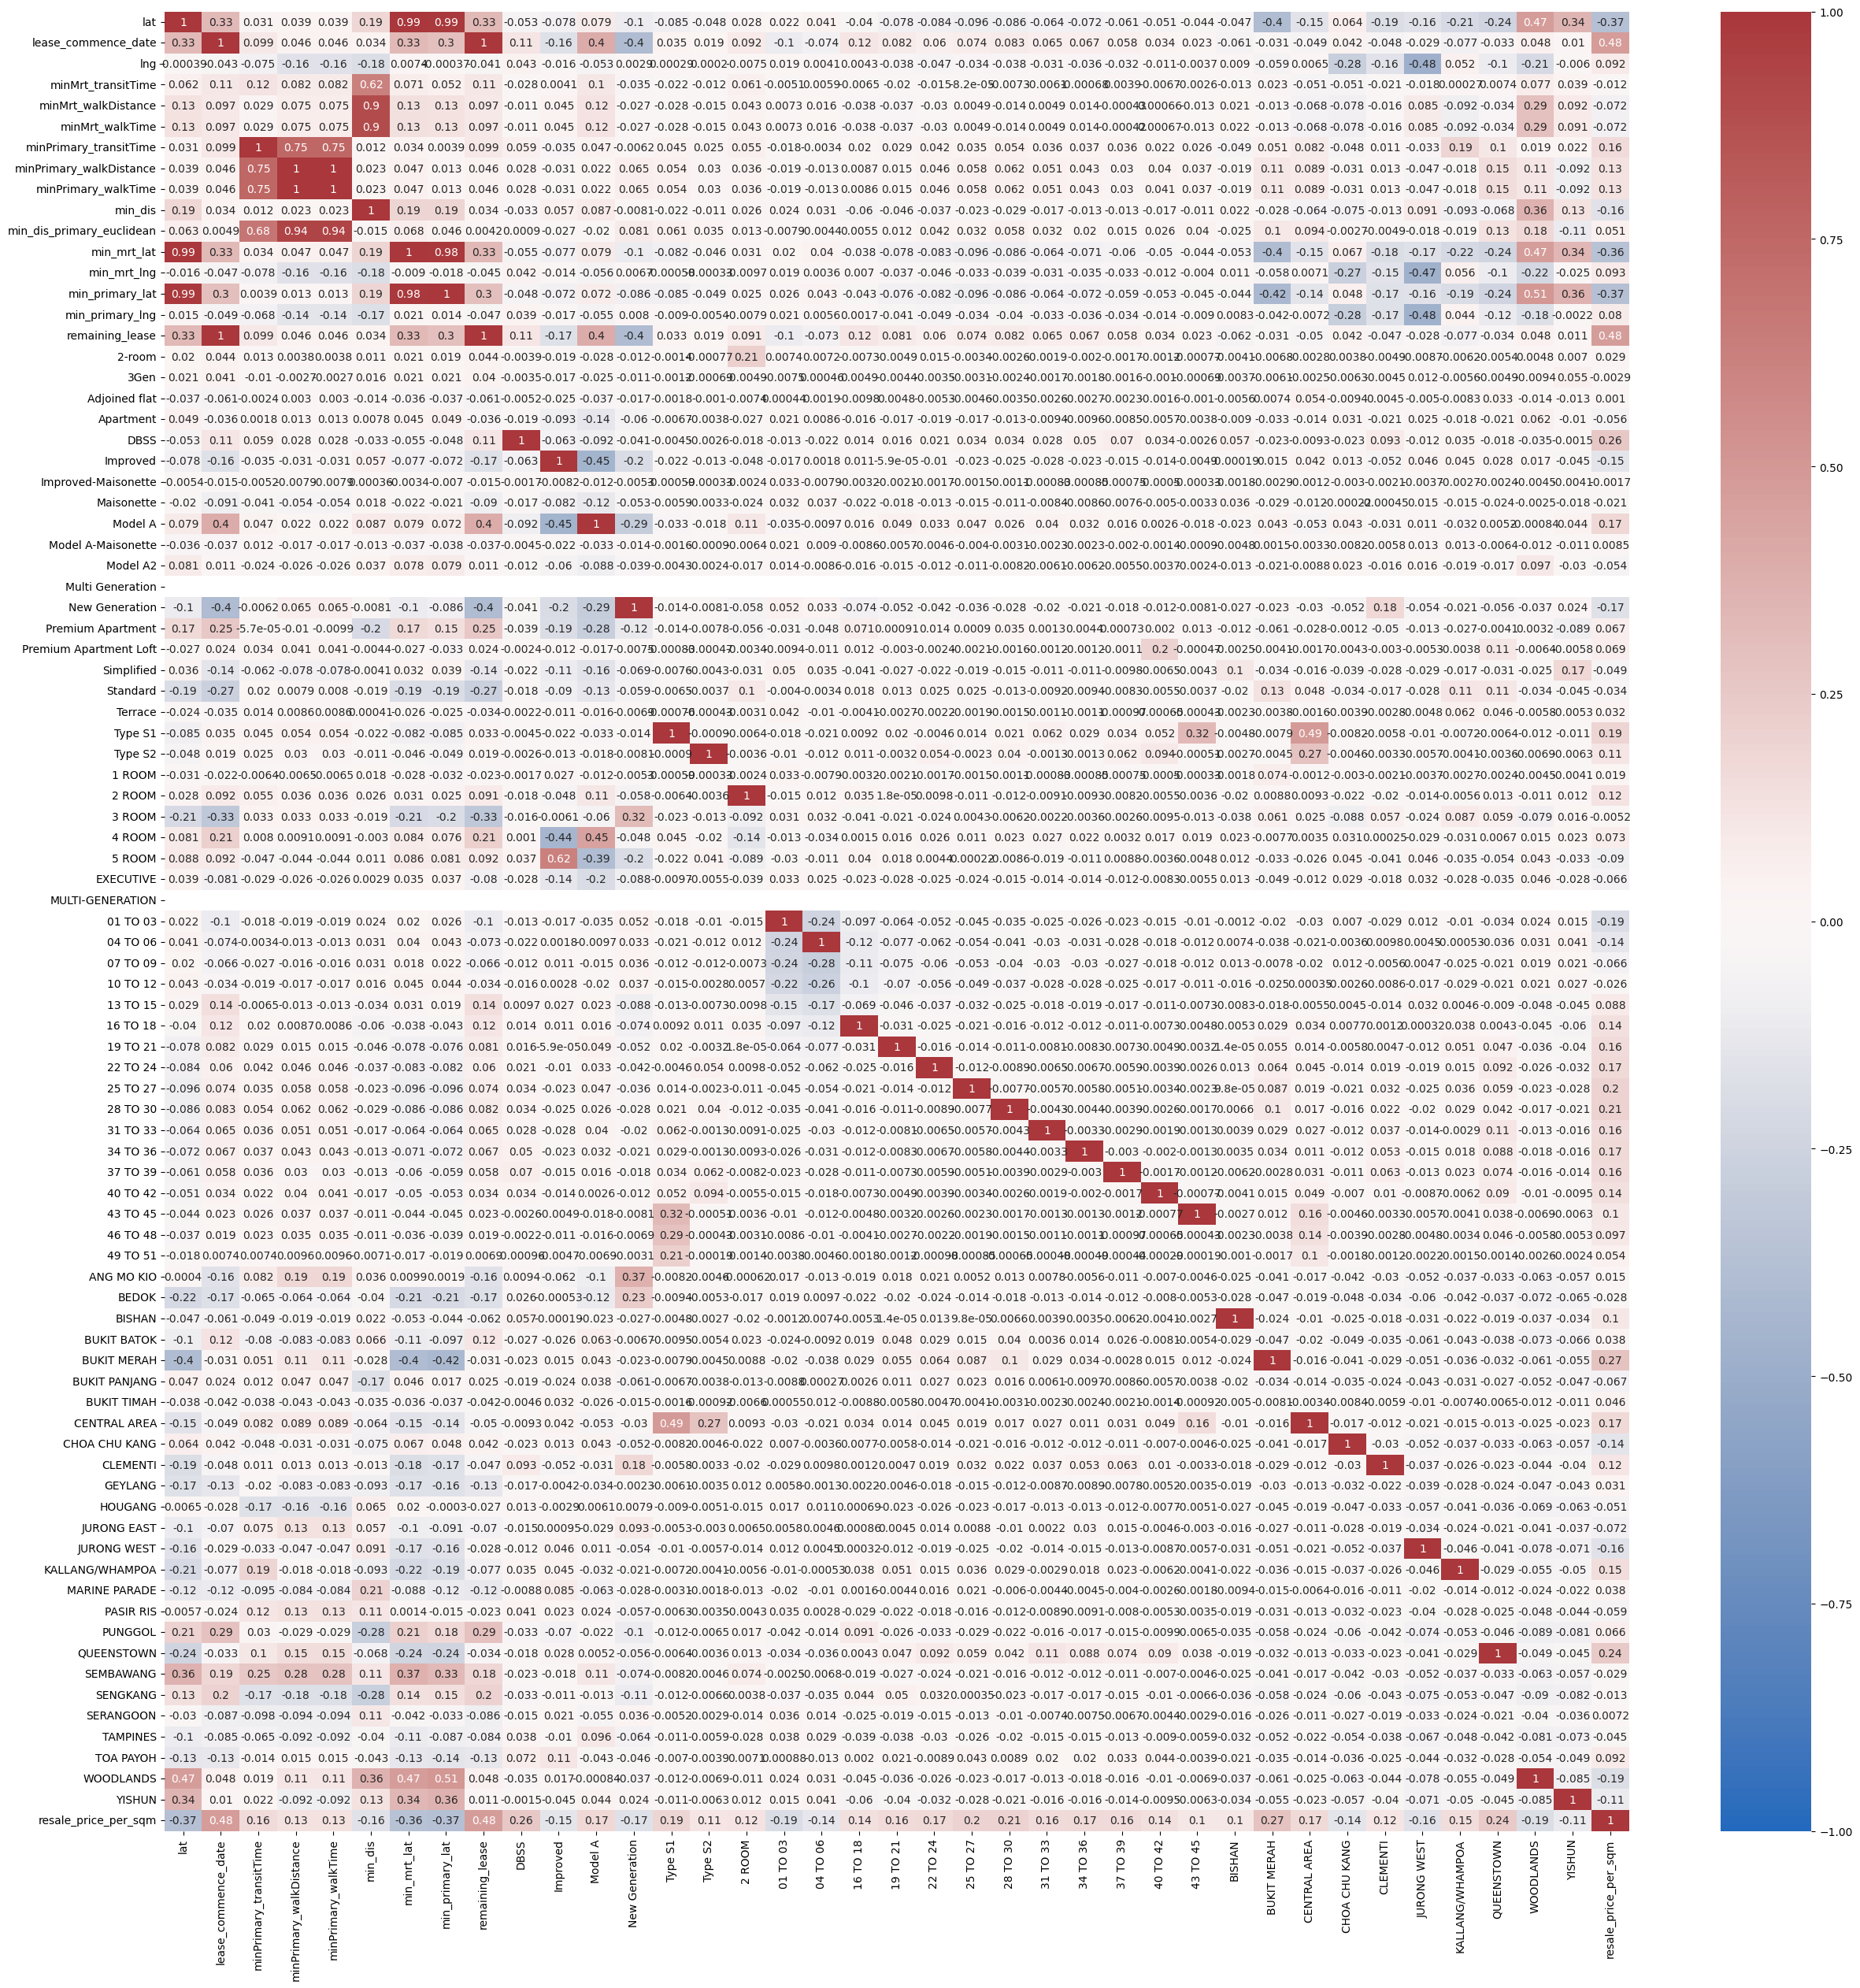

In [310]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_corr[correlated_col], 
            annot = True, cmap = "vlag", vmin = -1, vmax = 1)

In [311]:
# according to observation

for high_corr_feature in ['min_mrt_lat', 'min_primary_lat', 'lease_commence_date', 'minPrimary_walkDistance', 'minPrimary_walkTime']:
    correlated_col.remove(high_corr_feature)

correlated_col

['lat',
 'minPrimary_transitTime',
 'min_dis',
 'remaining_lease',
 'DBSS',
 'Improved',
 'Model A',
 'New Generation',
 'Type S1',
 'Type S2',
 '2 ROOM',
 '01 TO 03',
 '04 TO 06',
 '16 TO 18',
 '19 TO 21',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '31 TO 33',
 '34 TO 36',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 'BISHAN',
 'BUKIT MERAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'QUEENSTOWN',
 'WOODLANDS',
 'YISHUN',
 'resale_price_per_sqm']

In [312]:
len(correlated_col)

34

<AxesSubplot:>

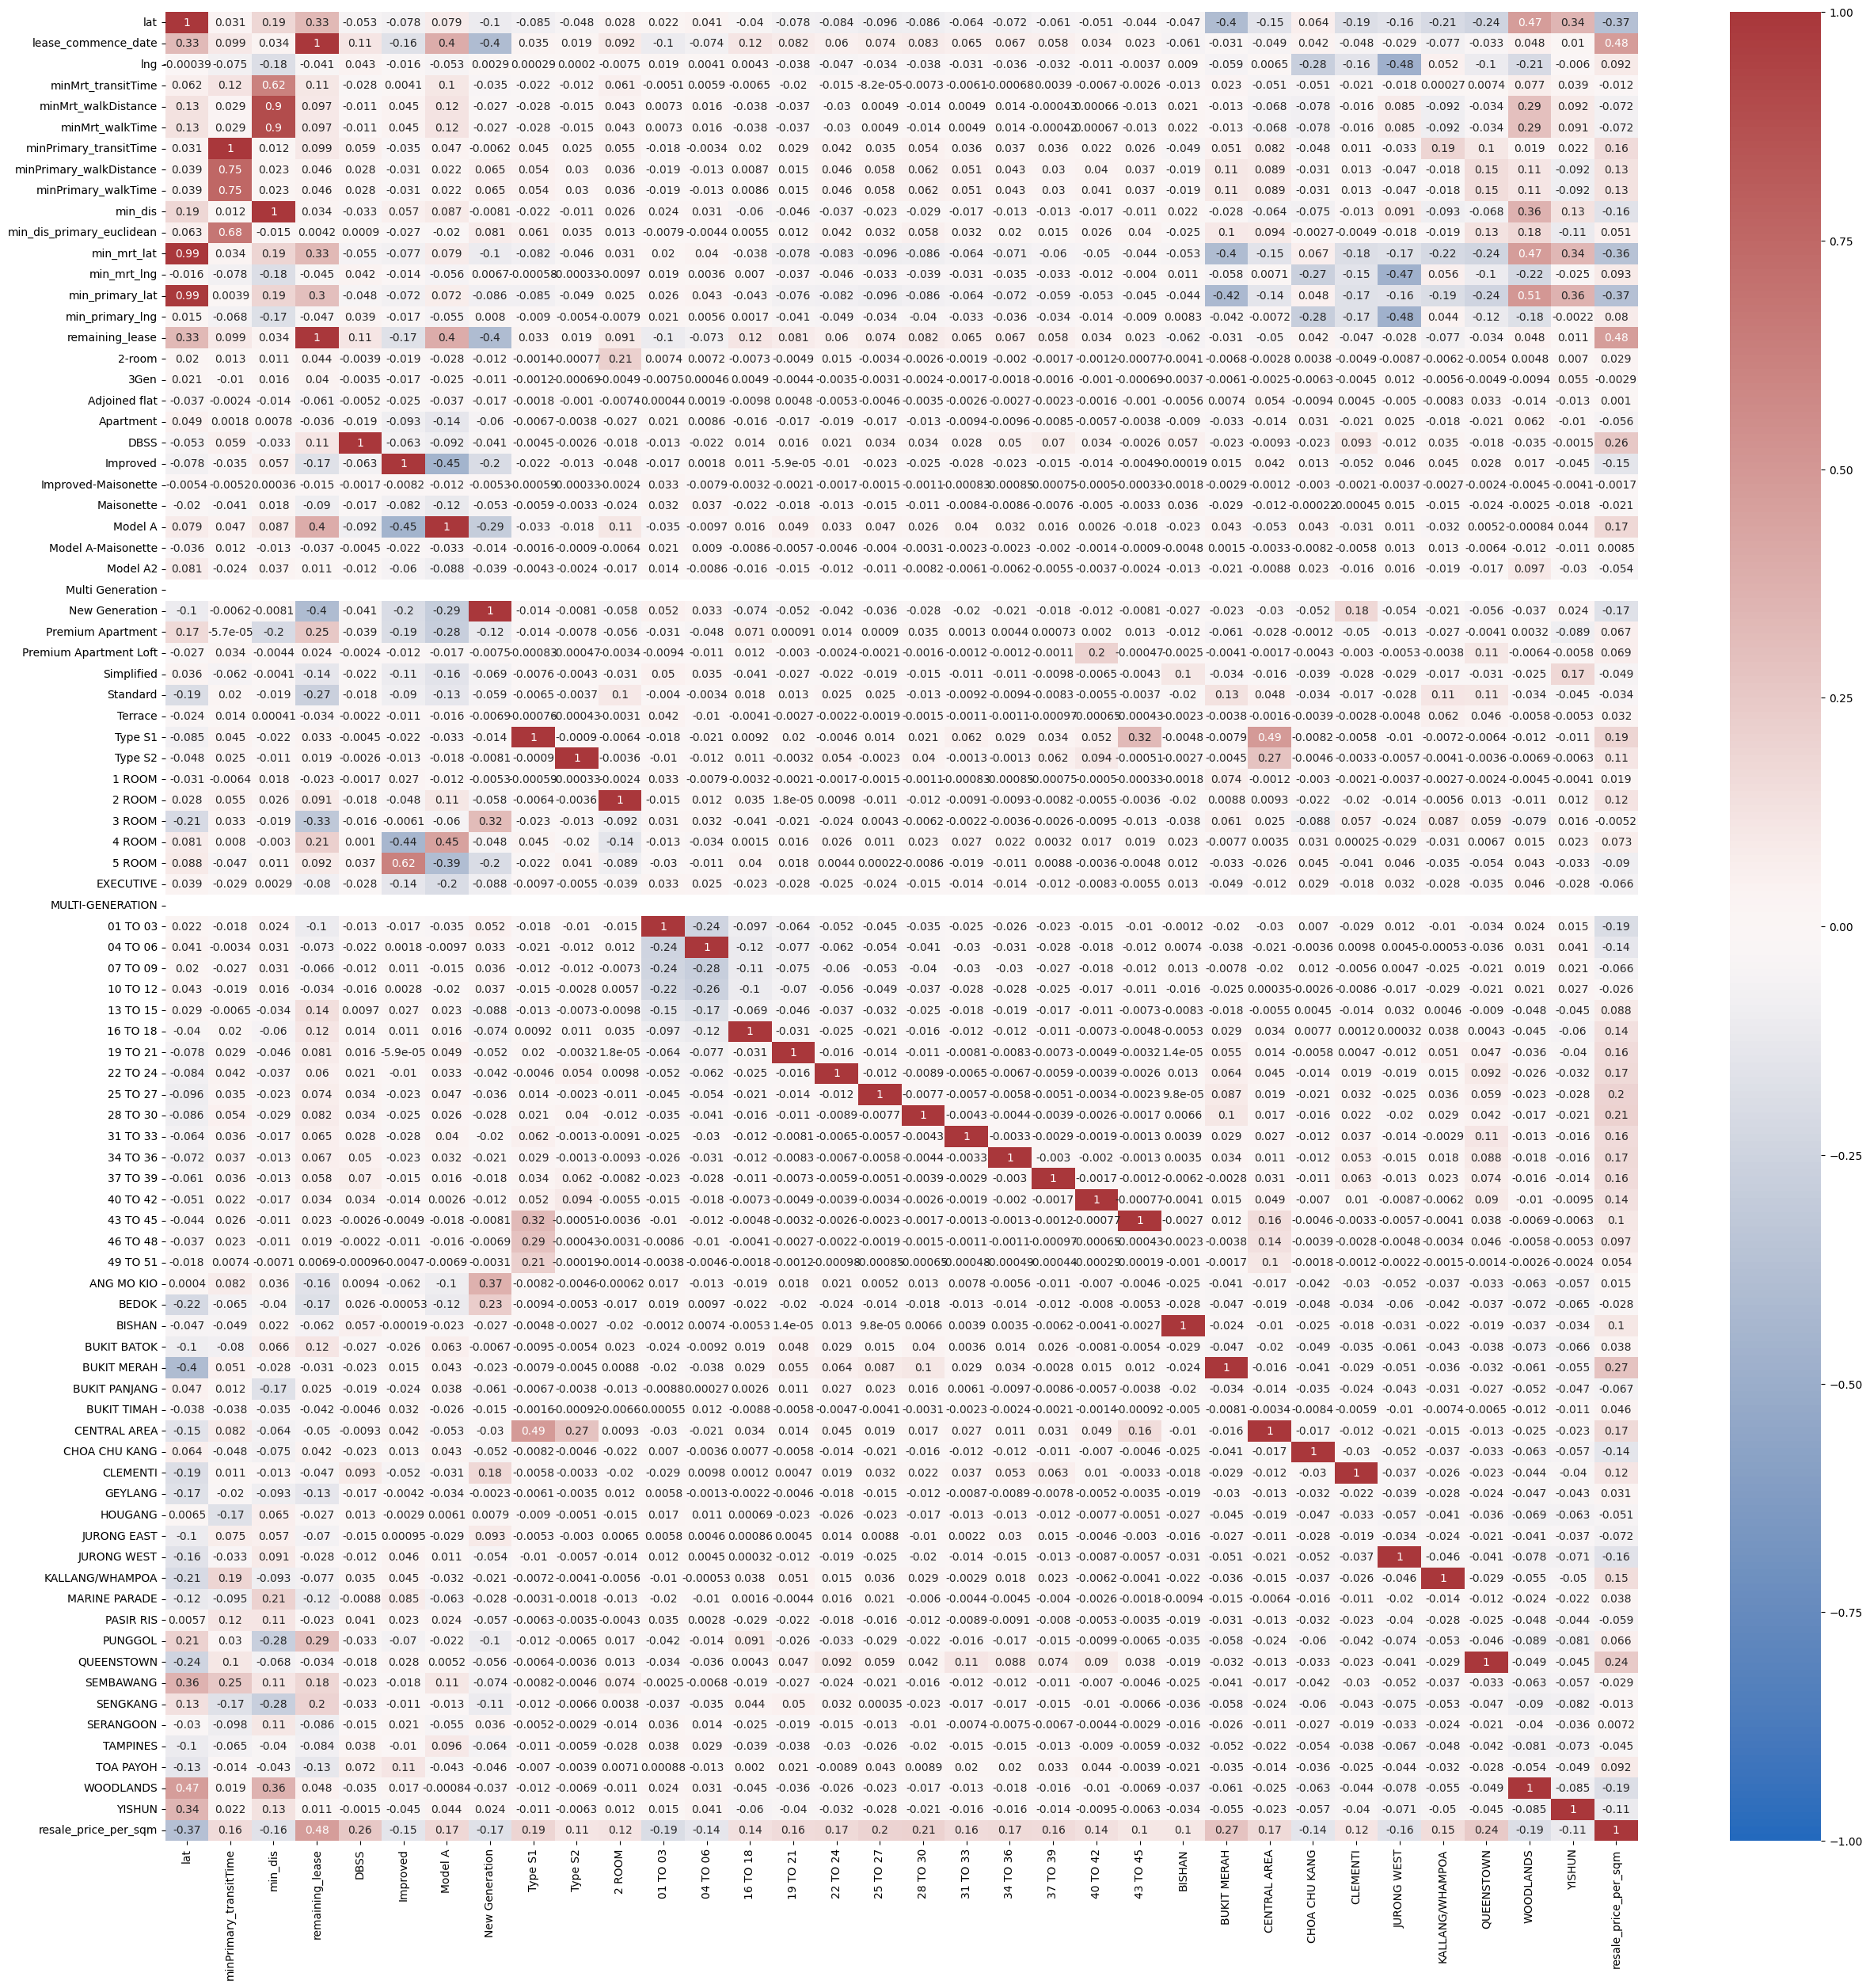

In [313]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_corr[correlated_col], 
            annot = True, cmap = "vlag", vmin = -1, vmax = 1)

In [314]:
train34 = train[correlated_col]
train34 = train34.reset_index().drop('index', axis = 1)

In [315]:
test34 = test[correlated_col]
test34 = test34.reset_index().drop('index', axis = 1)

In [316]:
test34.to_csv('full_hdb_perSqm_test_f34.csv')
train34.to_csv('full_hdb_perSqm_train_f34.csv')

In [317]:
condition = abs(train_corr['resale_price_per_sqm']) >= 0.168

correlated_col = train_corr.columns[condition]

correlated_col = list(correlated_col)

print(correlated_col)
print(len(correlated_col))

['lat', 'lease_commence_date', 'min_mrt_lat', 'min_primary_lat', 'remaining_lease', 'DBSS', 'Model A', 'New Generation', 'Type S1', '01 TO 03', '22 TO 24', '25 TO 27', '28 TO 30', '34 TO 36', 'BUKIT MERAH', 'CENTRAL AREA', 'QUEENSTOWN', 'WOODLANDS', 'resale_price_per_sqm']
19


<AxesSubplot:>

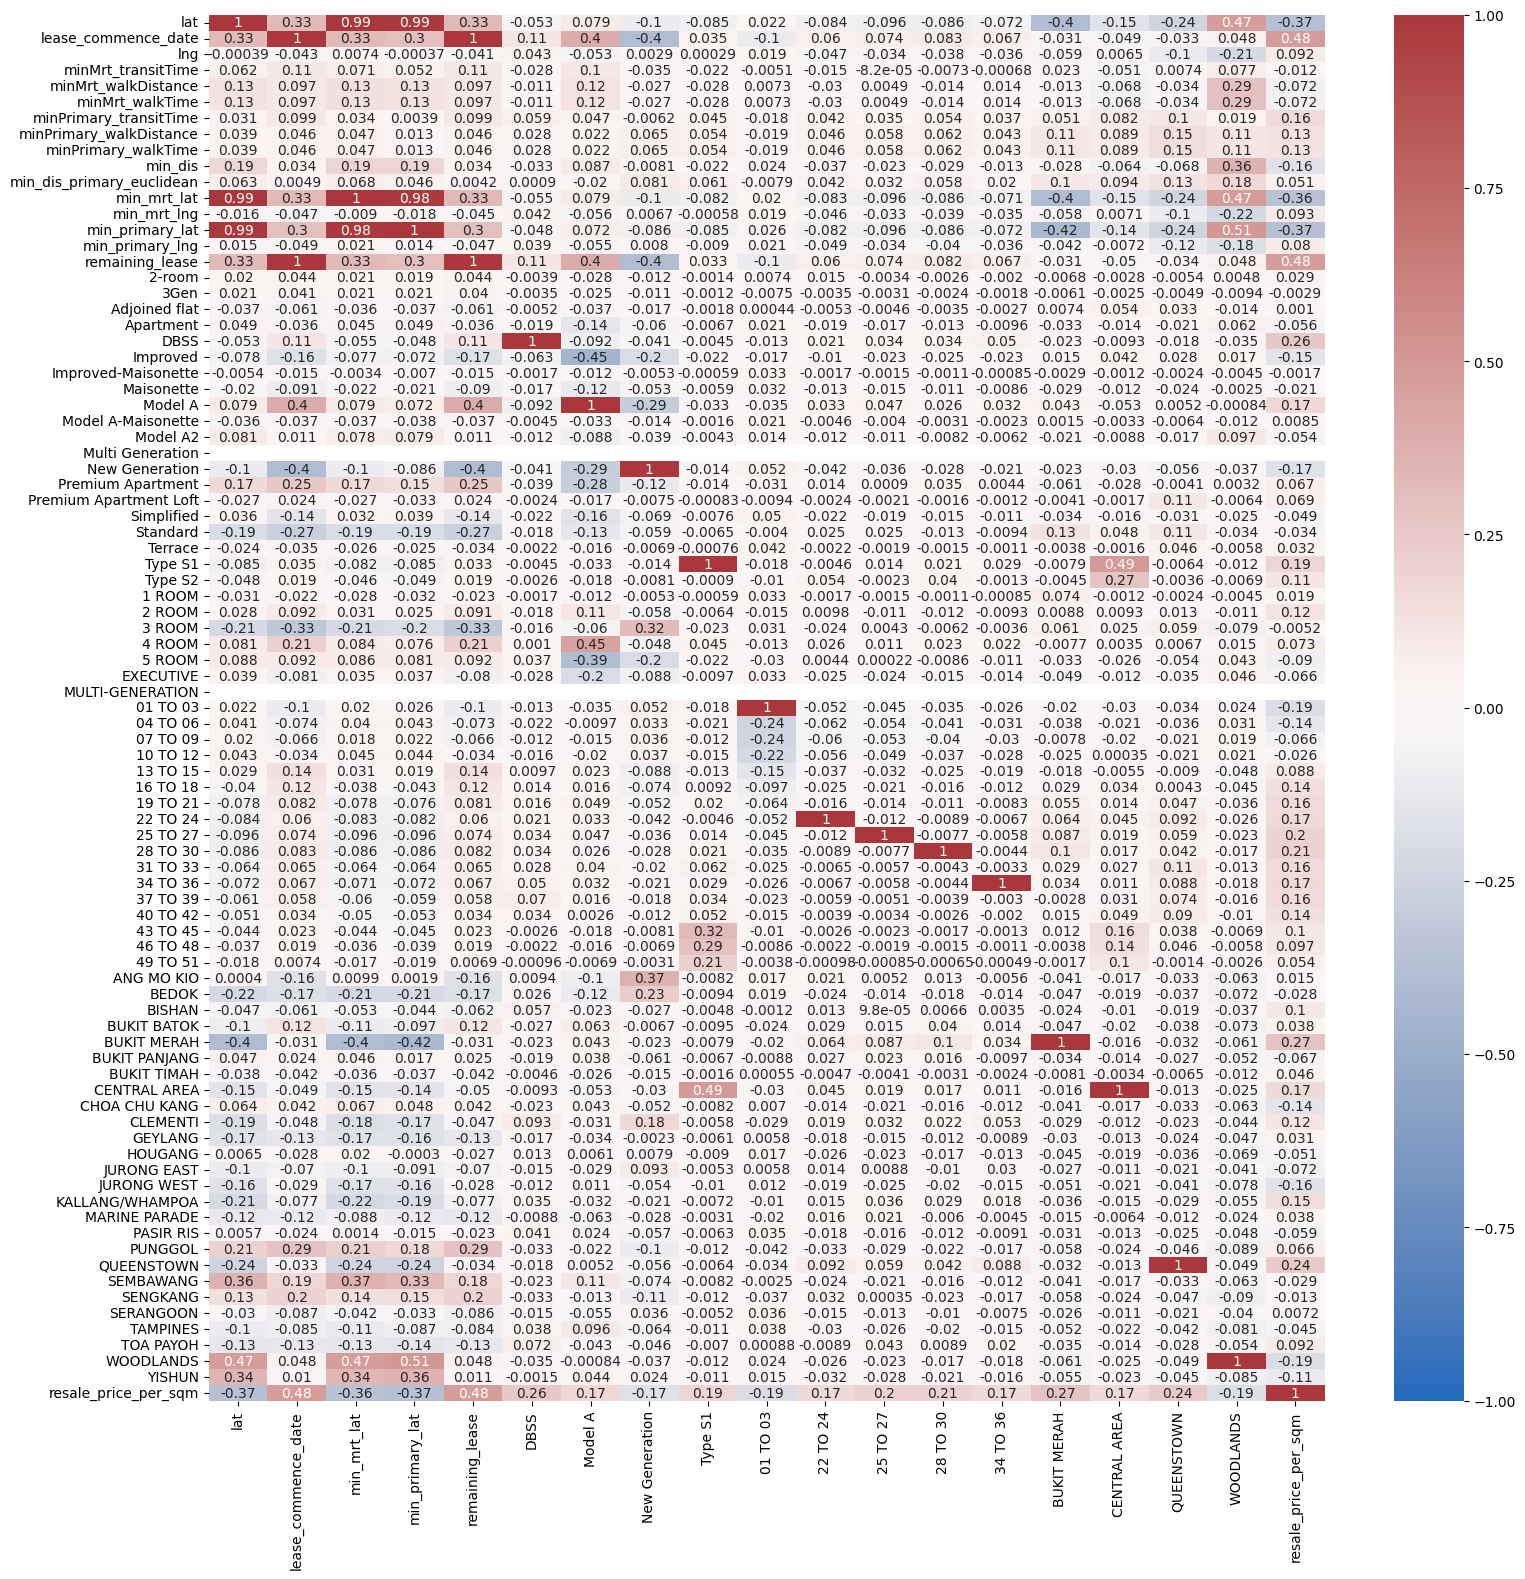

In [318]:
plt.figure(figsize = (18, 18))
sns.heatmap(train_corr[correlated_col], 
            annot = True, cmap = "vlag", vmin = -1, vmax = 1)

In [319]:
# according to observation

for high_corr_feature in ['min_mrt_lat', 'min_primary_lat', 'lease_commence_date']:
    correlated_col.remove(high_corr_feature)

correlated_col

['lat',
 'remaining_lease',
 'DBSS',
 'Model A',
 'New Generation',
 'Type S1',
 '01 TO 03',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '34 TO 36',
 'BUKIT MERAH',
 'CENTRAL AREA',
 'QUEENSTOWN',
 'WOODLANDS',
 'resale_price_per_sqm']

<AxesSubplot:>

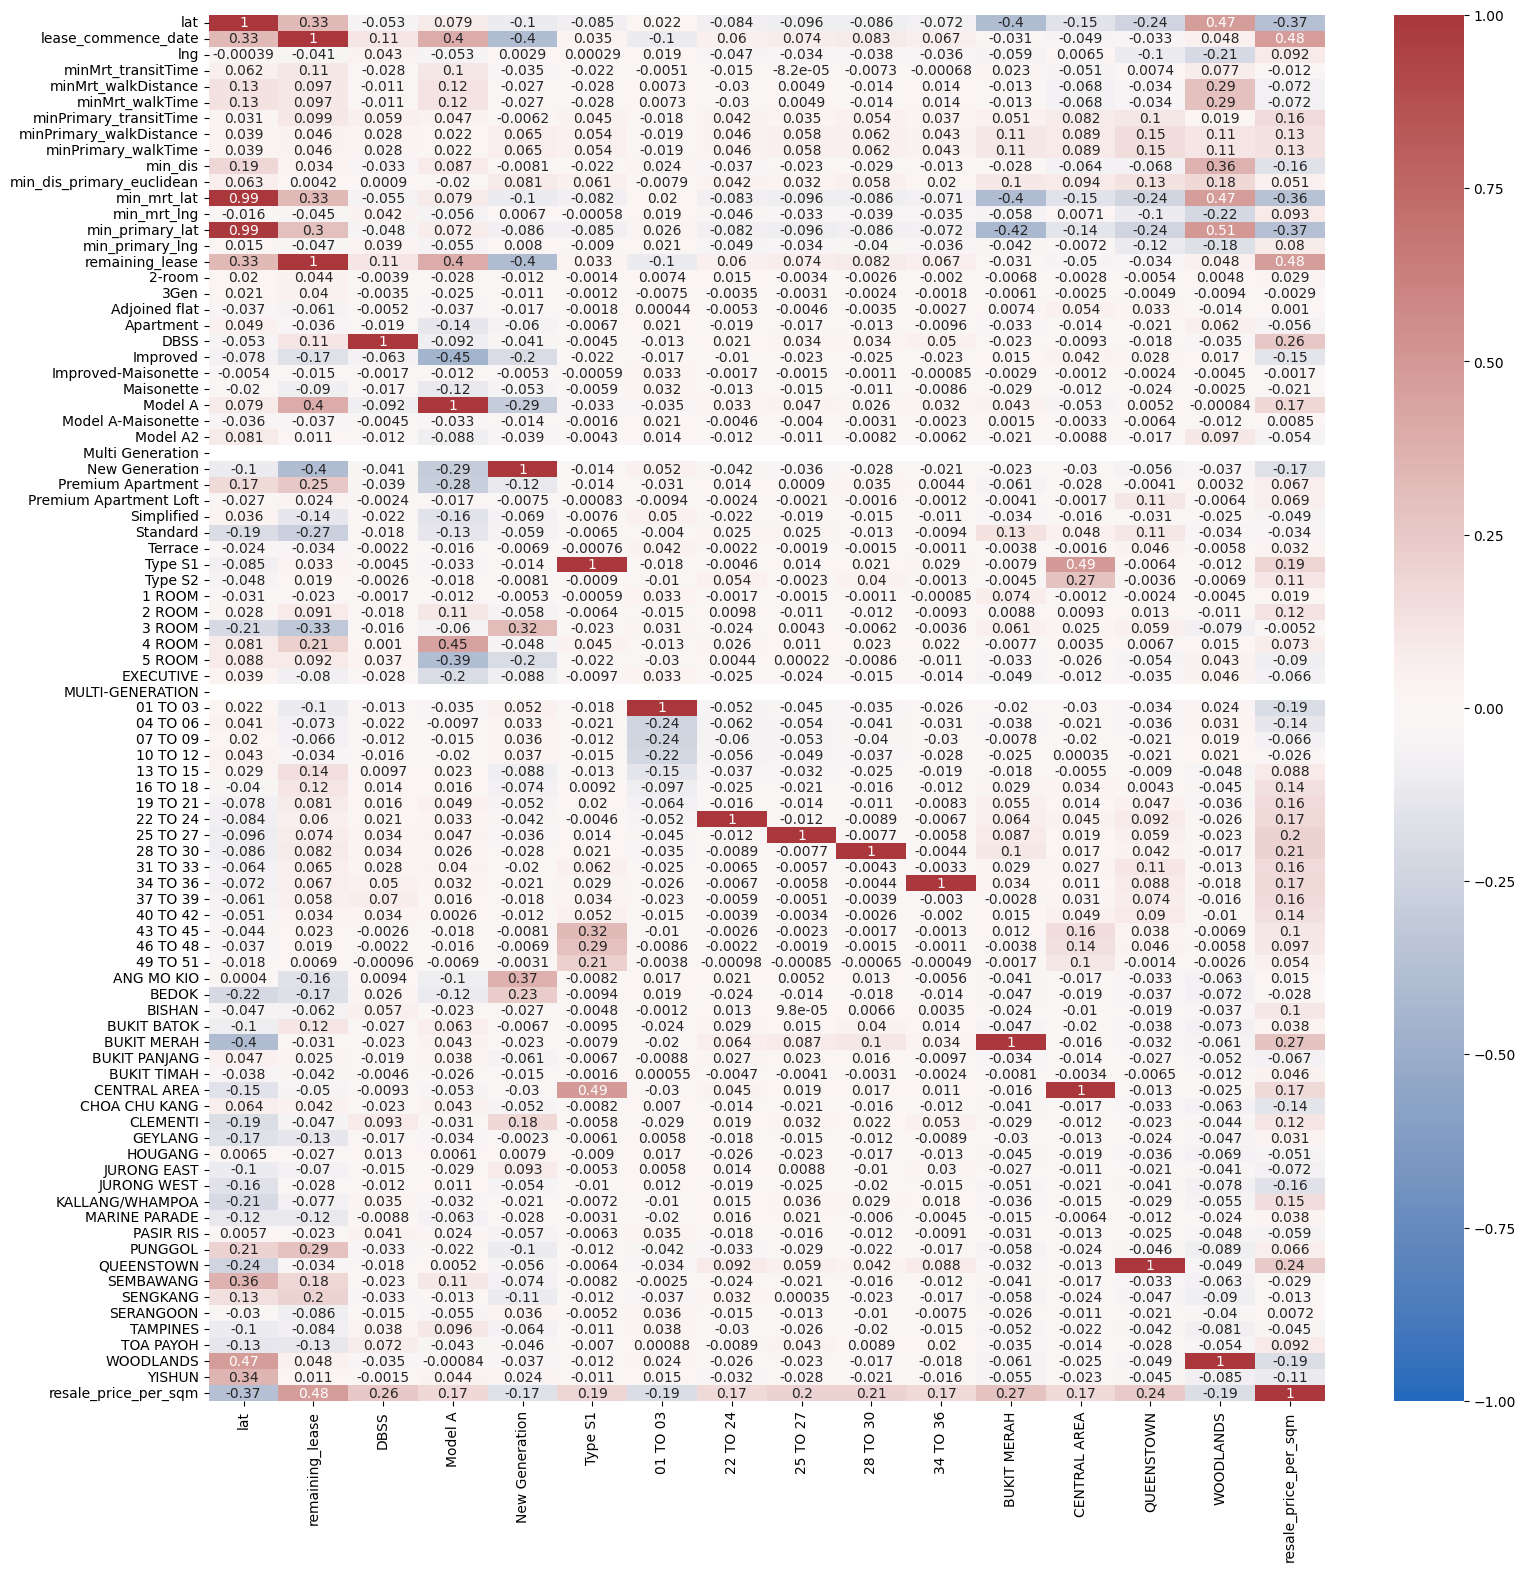

In [320]:
plt.figure(figsize = (18, 18))
sns.heatmap(train_corr[correlated_col], 
            annot = True, cmap = "vlag", vmin = -1, vmax = 1)

In [321]:
train16 = train[correlated_col]
train16 = train16.reset_index().drop('index', axis = 1)

In [322]:
test16 = test[correlated_col]
test16 = test16.reset_index().drop('index', axis = 1)

In [323]:
test16.to_csv('full_hdb_perSqm_test_f16.csv')
train16.to_csv('full_hdb_perSqm_train_f16.csv')